## BMIS-2542: Python 10mins Analytics Challange
## Prescriptive Analysis on Bullying and Adolescent Risk Behavior Prevention
### Author @Ziyi Song

<img src= "https://rossieronline.usc.edu/wp-content/uploads/sites/11/2020/09/School-Bullying_Hero.jpg" style = "width:768px; height:300px;">

### Background

> Bullying has been a critical issue in schools for decades. Looking back to the 18th century peer-on-peer harassment was just as commonly seen as it is today. School bullying has tremendous negative impact on psychological health of adolescent and it cannot be ignored.

###  Content of this analysis contains

> - Adolescent risk behaviors after being bullied
> - Possible reasons of being bullied on school property
> - Suggestions and recommendations dealing with bullying
> - Limitations and improvement of the model

### About the data: Youth Risk Behavior Surveillance System (YRBSS)

> - A link and the description of the dataset goes here: https://www.cdc.gov/healthyyouth/data/yrbs/index.htm



## 1. Preparations

### 1.1 Import necessary packages and data

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 


from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [2]:
#Import data and examine

dfYRBS = pd.read_csv('yrbsdata.csv', na_values= '?')
dfYRBS.info()
dfYRBS.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962925 entries, 0 to 962924
Columns: 150 entries, sitecode to qtransgender
dtypes: float64(141), int64(6), object(3)
memory usage: 1.1+ GB


,sitetypenum,year,survyear,weight,stratum,PSU,record,age,sex,grade,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
count,962925.0,962925.000000,962925.000000,962925.000000,962925.000000,962925.000000,9.629250e+05,959611.000000,957244.000000,951473.000000,...,89563.000000,352802.000000,83896.000000,101867.000000,6017.000000,8272.000000,280714.000000,61823.000000,0.0,24938.000000
mean,2.0,2007.295385,9.147693,75.713347,17.623459,2.426024,7.770160e+05,4.953151,1.489968,2.356736,...,1.515012,3.761206,1.954336,1.280356,2.663121,1.761726,1.716195,1.148133,NaN,1.123787
std,0.0,7.504626,3.752313,103.431239,17.405085,3.528825,4.393087e+05,1.232072,0.499900,1.095122,...,0.891269,2.456638,1.088076,0.904379,1.698920,0.426053,1.000001,0.758818,NaN,0.527804
min,2.0,1991.000000,1.000000,0.342800,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,2.0,2003.000000,7.000000,14.165600,6.000000,1.000000,4.026490e+05,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,NaN,1.000000
50%,2.0,2009.000000,10.000000,39.956400,13.000000,2.000000,7.851730e+05,5.000000,1.000000,2.000000,...,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,NaN,1.000000
75%,2.0,2013.000000,12.000000,104.953900,23.000000,2.000000,1.171845e+06,6.000000,2.000000,3.000000,...,2.000000,6.000000,3.000000,1.000000,4.000000,2.000000,2.000000,1.000000,NaN,1.000000
max,2.0,2017.000000,14.000000,4035.662800,137.000000,68.000000,1.509748e+06,7.000000,2.000000,4.000000,...,5.000000,8.000000,5.000000,6.000000,6.000000,2.000000,4.000000,7.000000,NaN,4.000000


### 1.2  Variables of interest and Cleaning

> To create bully-free schools that allow students to focus on learning, administrators and teachers can better understand how bullying occurs. Variables of interests for 1.2.1 are selected based on the potential reasons of power imbalance.

<img src="https://img.freepik.com/free-vector/stop-bullying-message-with-elements_23-2148584304.jpg" style = "float:right; width:400px; height:400px;">

### 1.2.1 Variables for regression analysis and classification 
- 🔸q23: Been bullied on school property
- race4: 4-level race, 1 White, 2 African American, 3 Hispanic, 4 Other
- stheight: Height without shoes
- stweight: Weight without shoes
- qnobese: Obesity indicator 1 Yes and 2 No
- qnowt: Overweight indicator 1 Yes and  2 No
- q24: Been bullied electronically (Online)
- q25: Feel sad or hopeless for 2 weeks or more in a row
- q30: Tried smoking? 1 Yes and  2 No
- q67: 1 Heterosexual, 2 Gay or Lesbian, 3 Bisexual, 4 Not sure
- q68: How do you describe your weight? 5-level
- q79: How many days in the past week physical activity >= 60 mins in a day?
- qmusclestrength: Muscle builder?
- q89: Grade in school 7-level, 1 is A
- age, bmi, grade

In [3]:
#Data selection
dfSelect = dfYRBS[['age','stheight','stweight','grade','race4','bmi','qnobese','qnowt','q24','q25','q30','q67','q68','q79','qmusclestrength','q89','q23']]
#drop null records
dfSelect1 = dfSelect.dropna()
dfSelect1.describe()

,age,stheight,stweight,grade,race4,bmi,qnobese,qnowt,q24,q25,q30,q67,q68,q79,qmusclestrength,q89,q23
count,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000
mean,4.911272,1.680941,66.174207,2.467632,2.741456,23.269681,1.865300,1.845999,1.839030,1.719475,1.709020,1.214717,3.177590,4.891704,3.750436,2.142206,1.794264
std,1.214593,0.103407,17.508204,1.104672,1.380459,5.041522,0.341426,0.360974,0.367528,0.449286,0.454245,0.677286,0.835834,2.472164,2.404233,1.435294,0.404266
min,1.000000,1.320000,31.750000,1.000000,1.000000,13.299383,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.600000,54.430000,1.000000,1.000000,19.827735,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000
50%,5.000000,1.680000,62.600000,2.000000,3.000000,22.078892,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,5.000000,3.000000,2.000000,2.000000
75%,6.000000,1.750000,74.390000,3.000000,4.000000,25.482894,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,7.000000,6.000000,3.000000,2.000000
max,7.000000,2.030000,180.990000,4.000000,4.000000,54.044612,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,5.000000,8.000000,8.000000,7.000000,2.000000


In [4]:
#check if null data exists
dfSelect1.isnull().sum().sum()

0

<img src="https://media.istockphoto.com/vectors/increased-use-of-ecigarettes-among-teenagers-vector-id951795376?k=20&m=951795376&s=612x612&w=0&h=5LoA4FNvy_0qg9n1J1vRU8GjsWEzkJu3t4RXwA_mCL8=" style = "float:right; width:109px; height:306px;">

### 1.2.2 Variables for Mean Comparison on Adolescent Risk Behaviors

- 🔸q23: Been bullied on school property
- q13: Carry lethal weapon on school property
- q18: 8-level answer on times involved in physical fight at school property
- q28: 5-level answer on times attempt suicide
- qchokeself: Choke someone or choke oneself on purpose 1 Yes and 2 No
- qcigschool: 7-level answer, times in past 30 days smoke at school property
- qmarijuanaschool: 6-level answer, times in past 30 days use marijuana at school property
- q88: 7-level answer, hours of sleep 4-10 hours
- q80: 7-level answer, hours of TV per day
- q81: 7-level answer, hours of Video Game per day
- q82: 6-level answer, PE class attendance

In [5]:
#Data selection for 1.2.2

dfSelect2 = dfYRBS[['q23','q13','q15','q18','q28','qchokeself','qcigschool','qmarijuanaschool','q88','q80','q81','q82']]

#Will drop null record in later steps to utilize sample size, use every available data record

### 1.3 Recoding and Descriptions

### 1.3.1 Variables for regression analysis and classification recoding

- race4 ⏩ non-white coded as 1 for minority, white coded as 0
- qnobese ⏩ 1 for obesity, 0 not obesity
- qnowt ⏩ 1 for overweight, 0 not overweight
- q23 ⏩ 1 bullied, 0 not bullied
- q24 ⏩ 1 bullied, 0 not bullied
- q25 ⏩ 1 sad and hopeless, 0 not
- q30 ⏩ 1 tried smoking, 0 not
- q67 ⏩ 1 LGBT, 0 straight

#### Code shows below

In [6]:
dfSelect1['race4'] = np.where(dfSelect1['race4'] != 1, 1, 0)
dfSelect1['qnobese'] = np.where(dfSelect1['qnobese'] == 1, 1, 0)
dfSelect1['qnowt'] = np.where(dfSelect1['qnowt'] == 1, 1, 0)
dfSelect1['q23'] = np.where(dfSelect1['q23'] == 1, 1, 0)
dfSelect1['q24'] = np.where(dfSelect1['q24'] == 1, 1, 0)
dfSelect1['q25'] = np.where(dfSelect1['q25'] == 1, 1, 0)
dfSelect1['q30'] = np.where(dfSelect1['q30'] == 1, 1, 0)
dfSelect1['q67'] = np.where(dfSelect1['q67'] != 1, 1, 0)
dfSelect1.head()

,age,stheight,stweight,grade,race4,bmi,qnobese,qnowt,q24,q25,q30,q67,q68,q79,qmusclestrength,q89,q23
382375,1.0,1.78,61.24,4.0,1,19.328368,0,0,0,1,0,1,3.0,3.0,1.0,3.0,0
382380,1.0,1.68,108.86,4.0,1,38.570011,1,0,1,1,0,1,5.0,8.0,6.0,2.0,1
382388,2.0,1.60,49.90,1.0,1,19.492188,0,0,0,0,1,0,3.0,8.0,8.0,3.0,0
382389,2.0,1.68,52.16,1.0,1,18.480726,0,0,0,0,0,0,3.0,1.0,6.0,3.0,0
382391,2.0,1.70,55.79,1.0,1,19.304498,0,0,0,0,0,0,3.0,5.0,5.0,3.0,0


### 1.3.2 Variables for Mean Comparison on Adolescent Risk Behaviors recoding
- q23 ⏩ 1 bullied, 0 not bullied
- q13 ⏩ 1 for carry lethal weapon, 0 for not carry
- q28 ⏩ 1 for attempted suicide, 0 for not
- qchokeself ⏩ 1 for choked on purpose, 
- qcigschool ⏩ 1 for smoked on school property, 0 for not
- qmarijuanaschool ⏩ 1 for past 30 days use marijuana at school property, 0 for not

**Recode will be conducted in later steps**


## 2. Mean Comparison on variables of interest

,CarryLethalWeapon,Suicide,Choke,SmokeAtSchool,WeedAtSchool
,mean,mean,mean,mean,mean
Bullied?,,,,,
0,0.088396,0.950177,0.058502,0.027965,0.040823
1,0.130026,0.838323,0.125749,0.052181,0.065013


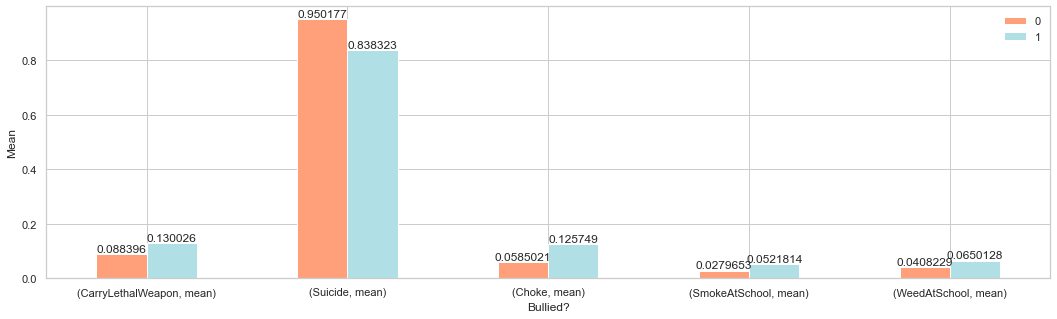

In [7]:
#select data and drop null
dfMean1 = dfSelect2[['q23','q13','q28','qchokeself','qcigschool','qmarijuanaschool']]
dfMean2 = dfMean1.dropna()
#recode and rename for selected data
dfMean2['Bullied?'] = np.where(dfMean2['q23'] == 1, 1, 0)
dfMean2['CarryLethalWeapon'] = np.where(dfMean2['q13'] != 1, 1, 0)
dfMean2['Suicide'] = np.where(dfMean2['q28'] == 1, 1, 0)
dfMean2['Choke'] = np.where(dfMean2['qchokeself'] == 1, 1, 0)
dfMean2['SmokeAtSchool'] = np.where(dfMean2['qcigschool'] != 1, 1, 0)
dfMean2['WeedAtSchool'] = np.where(dfMean2['qmarijuanaschool'] != 1, 1, 0)
#plot mean comparison
plt1 = dfMean2.groupby(['Bullied?']).agg({'CarryLethalWeapon':['mean'],'Suicide':['mean'],'Choke':['mean'],'SmokeAtSchool':['mean'],'WeedAtSchool':['mean']})
plt2 = plt1.T
ax = plt2.plot.bar(rot = 0,color=['lightsalmon','powderblue'], figsize = (18, 5))
plt.ylabel('Mean')
plt.xlabel('Bullied?')
plt.legend(loc = 0);
for container in ax.containers:
    ax.bar_label(container)
plt1

,FightAtSchool,HrsOfSleep,HrsOfTV,HrsOfVidGame,PE_Class
,mean,mean,mean,mean,mean
Bullied?,,,,,
0,1.101083,3.630087,3.295631,3.801176,2.792030
1,1.278065,3.344901,3.316272,4.041434,2.787938


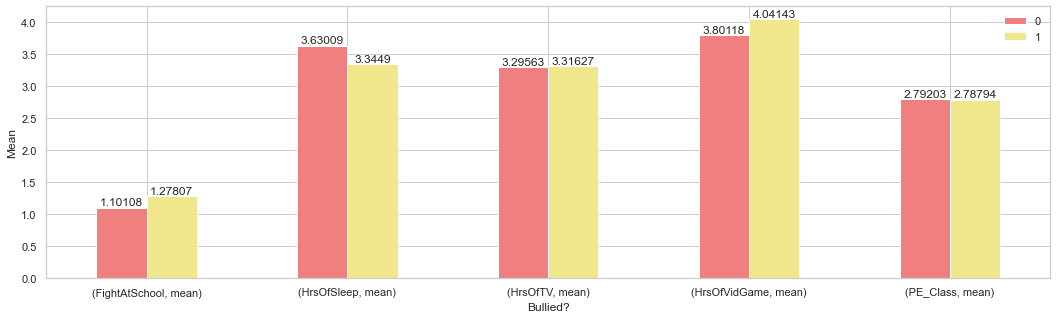

In [8]:
#select data and drop null
dfMean3 = dfSelect2[['q23','q18','q88','q80','q81','q82']]
dfMean4 = dfMean3.dropna()
#recode for selected data
dfMean4['Bullied?'] = np.where(dfMean4['q23'] == 1, 1, 0)
#rename columns
dfMean4.rename(columns={'q18':'FightAtSchool', 'q88':'HrsOfSleep','q80':'HrsOfTV','q81':'HrsOfVidGame','q82':'PE_Class'}, inplace=True)
#plot mean comparison
plt3 = dfMean4.groupby(['Bullied?']).agg({'FightAtSchool':['mean'],'HrsOfSleep':['mean'],'HrsOfTV':['mean'],'HrsOfVidGame':['mean'],'PE_Class':['mean']})
plt4 = plt3.T
ax = plt4.plot.bar(rot = 0,color=['lightcoral','khaki'], figsize = (18, 5))
plt.ylabel('Mean')
plt.xlabel('Bullied?')
plt.legend(loc = 0);
for container in ax.containers:
    ax.bar_label(container)
plt3

### ✅ Interpretations 

> - Among those risk behaviors, students experienced bully have a higher probability on carrying lethal weapon, chock themselves or others on purpose, smoke cigarettes and weed, involved in a physical fight at school.
> - They also sleep less, and put more hours on video games that might offer them some relief.
> - They have less suicide tendency, this is an unexpected finding.

## 3. Classification Using KNN - Cross Validation

### 3.1 Heatmap -  Identify the correlation

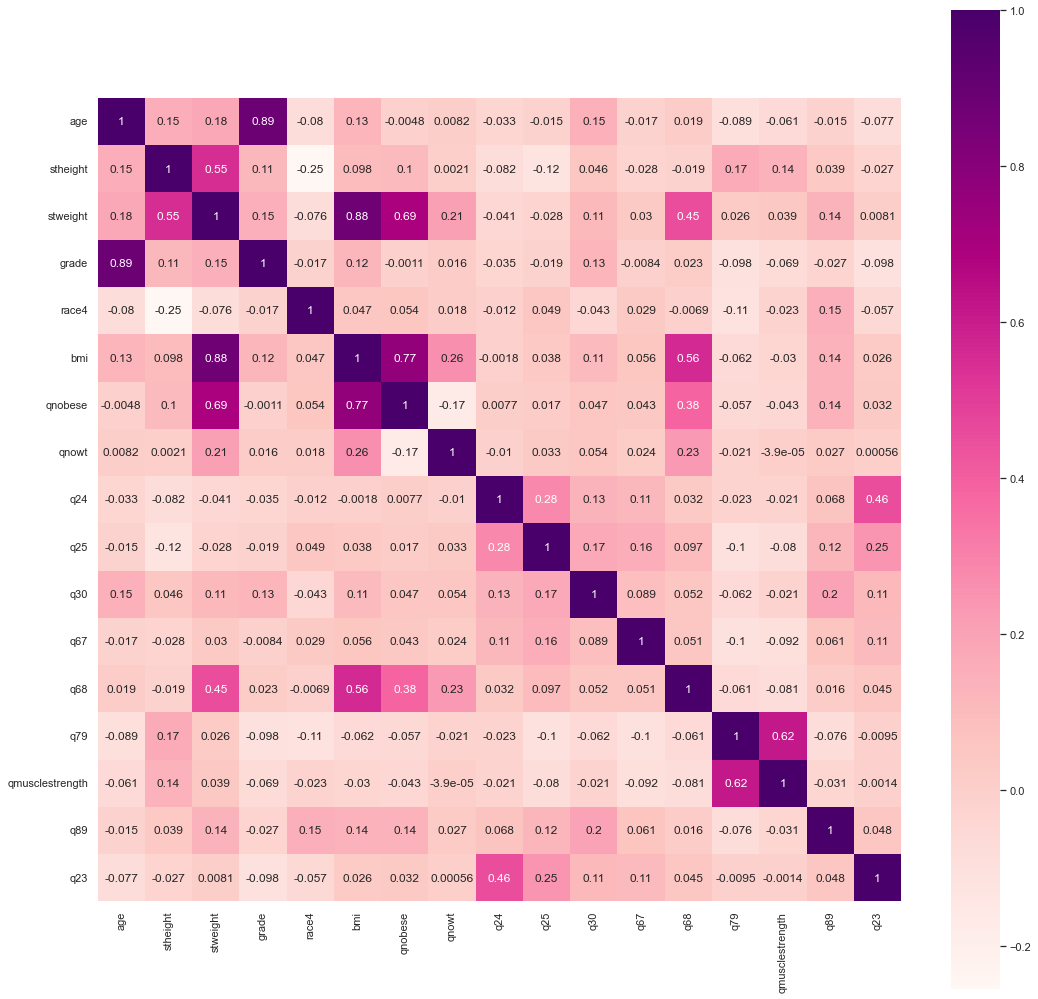

In [9]:
fig, ax = plt.subplots(figsize=(18,18))
corrmat = dfSelect1.corr()
sns.heatmap(corrmat, square = True, cmap="RdPu",annot=True);

💡 **Drop stweighy, age and qnobese since those variables have the correlation coefficient higher than 0.6**💡

In [10]:
dfSelect2 = dfSelect1.drop(labels = ["stweight", "age", "qnobese"], axis = 1) 
dfSelect2.head()

,stheight,grade,race4,bmi,qnowt,q24,q25,q30,q67,q68,q79,qmusclestrength,q89,q23
382375,1.78,4.0,1,19.328368,0,0,1,0,1,3.0,3.0,1.0,3.0,0
382380,1.68,4.0,1,38.570011,0,1,1,0,1,5.0,8.0,6.0,2.0,1
382388,1.60,1.0,1,19.492188,0,0,0,1,0,3.0,8.0,8.0,3.0,0
382389,1.68,1.0,1,18.480726,0,0,0,0,0,3.0,1.0,6.0,3.0,0
382391,1.70,1.0,1,19.304498,0,0,0,0,0,3.0,5.0,5.0,3.0,0


### 3.2 Training a Binary Classifier

#### 🔰 Partition the original dataset  into training (80%) and test (20%) sets.

In [11]:
#set seed
random_state =  np.random.RandomState(42)
X = dfSelect2.iloc[:, 0:13].values
Y = dfSelect2.iloc[:, 13].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print('Y train check')
print(unique_elements)
print(counts_elements)
unique_elements, counts_elements = np.unique(Y_test, return_counts=True)
print('Y test check')
print(unique_elements)
print(counts_elements)

(5968, 13) (5968,)
(1493, 13) (1493,)
Y train check
[0 1]
[4737 1231]
Y test check
[0 1]
[1189  304]


#### 🔰 Incorporate feature selection and feature scaling functionalities from scikit-learn as appropriate

In [12]:
#Feature Selection
ch2 = SelectKBest(chi2, k = 5)
X_train = ch2.fit_transform(X_train, Y_train)
X_test = ch2.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5968, 5)
(1493, 5)


In [13]:
cols = ch2.get_support(indices=True)
dfSelect2.iloc[:,cols].columns

Index(['grade', 'q24', 'q25', 'q30', 'q67'], dtype='object')

In [14]:
#Feathre Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5968, 5)
(1493, 5)


### 3.2.1 KNN 5-fold Cross Validation

In [15]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,6):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test)[:, 1]
       
        accuracy = knn_ht.score(X_test,Y_test)
        f1 = f1_score(Y_test,knn_ht.predict(X_test),average='weighted')
        roc = roc_auc_score(Y_test, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.812458  0.789621  0.625169
          distance  0.812458  0.789621  0.625169
2         uniform   0.817816  0.774548  0.645536
          distance  0.817816  0.774548  0.645536
3         uniform   0.829203  0.802468  0.677787
          distance  0.829203  0.802468  0.677787
4         uniform   0.825184  0.791647  0.693054
          distance  0.825184  0.791647  0.693054
5         uniform   0.824514  0.799174  0.718995
          distance  0.824514  0.799174  0.719014

In [16]:
x = 1
for number in range(1,6):
    print('NN = ', x, ', ', 'Weights = Uniform')
    knn_cv = KNeighborsClassifier(n_neighbors = x, weights = 'uniform')
    metrics = ['f1_macro', 'precision_macro', 'recall_macro', ]
    scores_multiple = cross_validate(knn_cv, X_train, Y_train, cv=5, scoring = metrics)
    sorted(scores_multiple.keys())  
    print('Avg. Precision:', scores_multiple['test_precision_macro'].mean())   
    print('Avg. Recall:', scores_multiple['test_recall_macro'].mean())    
    print('Avg. f1:', scores_multiple['test_f1_macro'].mean()) 
    x += 1
    print("\n")

NN =  1 ,  Weights = Uniform
Avg. Precision: 0.6400215179301936
Avg. Recall: 0.6268098232570575
Avg. f1: 0.6301418553161525


NN =  2 ,  Weights = Uniform
Avg. Precision: 0.7207940671822238
Avg. Recall: 0.5782013185131932
Avg. f1: 0.5836419306358518


NN =  3 ,  Weights = Uniform
Avg. Precision: 0.7008205409221582
Avg. Recall: 0.6347946407616353
Avg. f1: 0.648477680541781


NN =  4 ,  Weights = Uniform
Avg. Precision: 0.7142857068369155
Avg. Recall: 0.6080765100219799
Avg. f1: 0.6206529114691012


NN =  5 ,  Weights = Uniform
Avg. Precision: 0.7022166995637477
Avg. Recall: 0.6493075270025612
Avg. f1: 0.6609193354143577




In [17]:
y = 1
for number in range(1,6):
    print('NN = ', y, ', ', 'Weights = Distance')
    knn_cv = KNeighborsClassifier(n_neighbors = y, weights = 'distance')
    metrics = ['f1_macro', 'precision_macro', 'recall_macro', ]
    scores_multiple = cross_validate(knn_cv, X_train, Y_train, cv=5, scoring = metrics)
    sorted(scores_multiple.keys())  
    print('Avg. Precision:', scores_multiple['test_precision_macro'].mean())   
    print('Avg. Recall:', scores_multiple['test_recall_macro'].mean())    
    print('Avg. f1:', scores_multiple['test_f1_macro'].mean()) 
    y += 1
    print("\n")

NN =  1 ,  Weights = Distance
Avg. Precision: 0.6400215179301936
Avg. Recall: 0.6268098232570575
Avg. f1: 0.6301418553161525


NN =  2 ,  Weights = Distance
Avg. Precision: 0.7207940671822238
Avg. Recall: 0.5782013185131932
Avg. f1: 0.5836419306358518


NN =  3 ,  Weights = Distance
Avg. Precision: 0.6999074995684959
Avg. Recall: 0.6339816326315539
Avg. f1: 0.6475295086143993


NN =  4 ,  Weights = Distance
Avg. Precision: 0.7133642967814827
Avg. Recall: 0.6072635018918986
Avg. f1: 0.6196209118290916


NN =  5 ,  Weights = Distance
Avg. Precision: 0.7012884200168897
Avg. Recall: 0.6477871073633067
Avg. f1: 0.6593862972990937




In [18]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [19]:
Y_train_predicted = knn.predict(X_train)
print("Training Classification accuracy:", knn.score(X_train, Y_train))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train, Y_train_predicted))

Training Classification accuracy: 0.8329423592493298


Training Confusion matrix: 
[[4532  205]
 [ 792  439]]


Training Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      4737
           1       0.68      0.36      0.47      1231

    accuracy                           0.83      5968
   macro avg       0.77      0.66      0.68      5968
weighted avg       0.82      0.83      0.81      5968



In [20]:
#predicting the outcome for the test set
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.8245144005358339


Test Confusion matrix: 
[[1137   52]
 [ 210   94]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1189
           1       0.64      0.31      0.42       304

    accuracy                           0.82      1493
   macro avg       0.74      0.63      0.66      1493
weighted avg       0.80      0.82      0.80      1493



###  3.2.2 Confusion Matrix

[[1137   52]
 [ 210   94]]


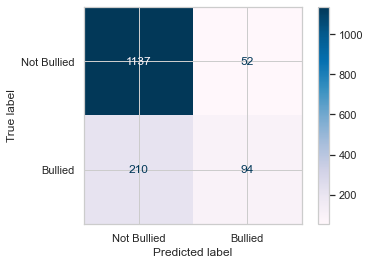

In [21]:
disp = plot_confusion_matrix(knn, X_test, Y_test,
                                 display_labels=['Not Bullied','Bullied'],
                                 cmap=plt.cm.PuBu,
                                 normalize=None)
print(disp.confusion_matrix)

### ✅ Annotations
> * **True Positives (TP)**: The model correctly predicted the student as bullied when it was indeed bullied 
> * **True Negatives (TN)**: The model correctly predicted the student as Not bullied when it was indeed Not bullied 
> * **False Positives(FP)**: The model incorrectly predicted the student as bullied when it was indeed Not bullied 
> * **False Negatives(FN)**: The model incorrectly predicted the student as Not bullied when it was indeed bullied

### 3.2.3 Model Evaluation - ROC Curve

Area under the ROC: 0.7190142091983532


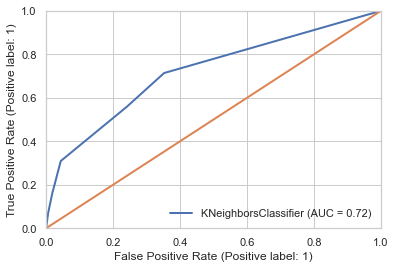

In [22]:
viz = plot_roc_curve(knn, X_test, Y_test)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

### ✅ Interpretations 
> - The area under the ROC is 0.719, which indicates the model works well.

## 4. Logistic Regression Analysis

In [23]:
formula = 'q23 ~ stheight + grade + race4 + bmi + qnowt + q24 + q25 + q30 + q67 + q68 + q79 + qmusclestrength + q89'
model = smf.logit(formula, data = dfSelect2)
reg = model.fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.405053
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    q23   No. Observations:                 7461
Model:                          Logit   Df Residuals:                     7447
Method:                           MLE   Df Model:                           13
Date:                Tue, 26 Apr 2022   Pseudo R-squ.:                  0.2030
Time:                        23:13:31   Log-Likelihood:                -3022.1
converged:                       True   LL-Null:                       -3792.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.6830      0.594     -4.518      0.000      -3.847      -1.519
stheight            0.4894      0.345      1.417      0.157      -0.188       1.166
grade              -0.2692      0.031     -8.622      0.000      -0.330      -0.208
race4              -0.3715      0.071     -5.225      0.000      -0.511      -0.232
bmi                 0.0169      0.008      2.128      0.033       0.001       0.033
qnowt              -0.0555      0.094     -0.591      0.555      -0.240       0.129
q24                 2.2413      0.075     29.798      0.000       2.094       2.389
q25                 0.7472      0.072     10.433      0.000       0.607       0.888
q30                 0.2507      0.073      3.413      0.001       0.107       0.395
q67                 0.3122      0.101      3.093      0.002       0.114       0.510
q68                 0.0183      0.047      0.390      0.697      -0.074       0.110
q79                -0.0105      0.017     -0.604      0.546      -0.045       0.024
qmusclestrength     0.0225      0.018      1.282      0.200      -0.012       0.057
q89                -0.0056      0.024     -0.236      0.813      -0.052       0.041
===================================================================================
"""

### ✅ Interpretations 

#### According to the logistic regression summary, we have:
> - Pseudo R-square is 0.2, the model works well for such noisy data.
> -Variable stheight, qnowt, q68(how do you describe your weight), q79(physical activity), qmusclestrength, q89(letter grade earned) are not significant at 0.05 level.
> - Variable grade(age), race4(minority), bmi, q24(being bullied online), q25(being sad or hopeless), q30(tried Smoking), q67(being sexual minority) are statistically significant at 0.05 level.

#### Variable interpretations:
> - Hold all else constant, one increment in a student's grade will result in 26.9% less of being bullied.
> - Hold all else constant, one increment in a student's bmi will result in 1.6% more of being bullied.
> - Hold all else constant, if a student is being bullied online, he or she may also facing bully at school property.
> - Hold all else constant, if a student is minority, he or she has higher chance to face bullying at school property.
> - Hold all else constant, if a student is sexual minority, he or she has higher chance to face bullying at school property.





#### 💡Other Insights - Regression plot on bmi vs being bullied💡

<AxesSubplot:xlabel='bmi', ylabel='q23'>

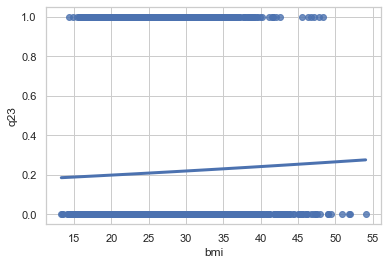

In [24]:
x = dfSelect2['bmi']
y = dfSelect2['q23']
sns.regplot(x=x, y=y, data = dfSelect2, logistic = True, ci = None)

## 5. Limitations 🚧

### 5.1 Data limitation
> - The data has null values, a selected dataframe cannot contain too many variables or there will be null.
> - Survey data is usually noisy.
> - There are questions that are highly correlated, such as bmi and obesity.
> - Some questions have inconsistent levels that are impossible to recode or use in deeper analysis. 
> - Level answers are mostly discrete.

### 5.2 Model limitation

> - Hypothesis testing should be conducted when comparing means, but it is not applicable because of the data limitation.
> - Causations and effects sometimes are ambiguous, for example, some students eat a lot when having a bad mood, which leads to a higher BMI, and have a higher probability of being bullied.
> - This type of survey data is unsuitable for regression models, and yet, this analysis still has one.

## 6. Conclusion and recommendations 🉑

### 6.1 Conclusion

#### 6.1.1 Findings
> - Physical power imbalance could be the primary reason of a student being bullied.
> - Students that experienced bullies are more likely to carry lethal weapons, that's where school shooting happens, a sense of unsafe.
> - Students that experienced bullies usually have their own way to relief that stress, and risk behaviors could be involved.
> - Racial and sexual minorities face discriminations and bullies at school.

#### 6.1.2 Unexpected findings
> - Muscle strength and physical activity are not significant, which means stronger kids can still being bullied, probably by older kids.
> - Students that experienced bullies have higher chance on smoke weed and cigarettes
> - Students that experienced bullies have lower chance to attempt suicide


### 6.2 Recommendations
> - Adults should respond quickly and consistently to bullying behavior.
> - Parents, school staff, and other adults in the community can help kids prevent bullying by talking about it.
> - Bully prevention strategies should be established.
> - See something, say something.
> - There should be other ways for students to relief stress instead of letting them go, risk behaviors might be involved.
> - There are laws that apply to bullying, don't be afraid.
> - The education of anti-discriminations should be enhanced.
> - Check out this website to know more about bullying prevention 🔗 https://www.stopbullying.gov/ 🔗


<img src= "https://www.pacer.org/bullying/classroom/images/ele-activites-banner.jpg" style = "width:1024px; height:300px;">